## 1. 实现混淆矩阵，精准率和召回率

In [43]:
import numpy as np
from sklearn import datasets

In [44]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [45]:
# 制造偏斜数据
y[digits.target==9] = 1
y[digits.target!=9] = 0    

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [48]:
y_log_predict = log_reg.predict(X_test)

In [49]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
TN(y_test, y_log_predict)

403

In [50]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test, y_log_predict)

2

In [51]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test, y_log_predict)

9

In [52]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test, y_log_predict)

36

In [53]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [54]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
precision_score(y_test, y_log_predict)

0.9473684210526315

In [55]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn) 
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.8

## 2. scikit-learn混淆矩阵，精准率和召回率

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [57]:
from sklearn.metrics import precision_score
precision_score(y_test, y_log_predict)

0.9473684210526315

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test, y_log_predict)

0.8

## 3. 兼顾两者的调和平均值F1 Score

In [59]:
import numpy as np

In [60]:
def f1_score(precision, recall):
    try:
        return 2*precision*recall/(precision+recall)
    except:
        return 0.0

In [61]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [62]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [63]:
precision = 0.0001
recall = 1
f1_score(precision, recall)

0.00019998000199980003

In [64]:
precision = 0.8
recall = 0.8
f1_score(precision, recall)

0.8000000000000002

In [65]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
# 制造偏斜数据
y[digits.target==9] = 1
y[digits.target!=9] = 0  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [67]:
y_predict = log_reg.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [69]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.9473684210526315

In [71]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.8

In [73]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.8674698795180723

## 4. Precision与Recall平衡
- 不同的决策阈值，会出现不同的Precision和Recall
- Precision与Recall呈现出负相关的特性

In [74]:
log_reg.decision_function(X_test)[:10]

array([-22.05700521, -33.02942449, -16.21334575, -80.37913585,
       -48.25123759, -24.54005307, -44.39166058, -25.04293078,
        -0.97828718, -19.71742826])

In [75]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
decision_scores = log_reg.decision_function(X_test)
print(np.min(decision_scores))
print(np.max(decision_scores))

-85.68610174168677
19.889596509658126


In [82]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[404   1]
 [ 21  24]]
0.96
0.5333333333333333


In [81]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')
print(confusion_matrix(y_test, y_predict_3))
print(precision_score(y_test, y_predict_3))
print(recall_score(y_test, y_predict_3))

[[390  15]
 [  5  40]]
0.7272727272727273
0.8888888888888888


## 5. 精准率召回率曲线

In [83]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
# 制造偏斜数据
y[digits.target==9] = 1
y[digits.target!=9] = 0  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

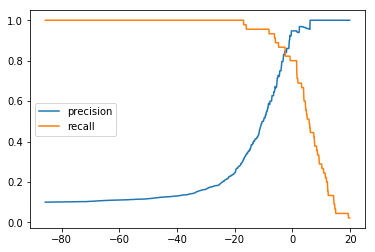

In [89]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.legend()
plt.show()

### 5.1 Precsion-Recall 曲线

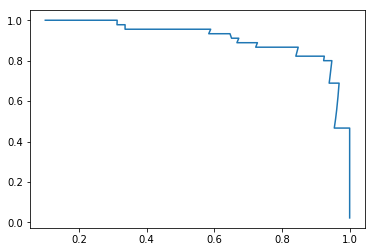

In [94]:
plt.plot(precisions, recalls)
plt.show()

### 5.2 scikit-learn 中的 Precsion-Recall 曲线

In [98]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, log_reg.decision_function(X_test))
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(145,)
(145,)
(144,)


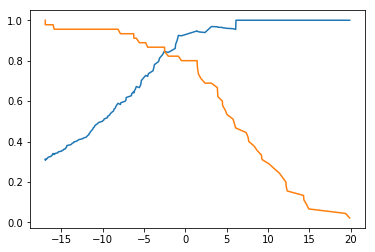

In [99]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

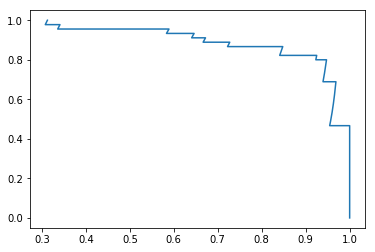

In [100]:
plt.plot(precisions, recalls)
plt.show()

## 6. ROC曲线

In [101]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 制造偏斜数据
y[digits.target==9] = 1
y[digits.target!=9] = 0  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
from metrics import FPR,TPR

fprs = []
tprs = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

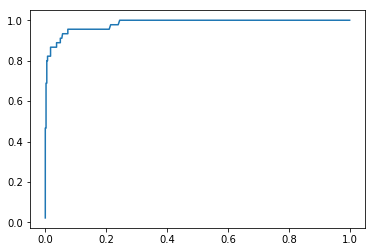

In [106]:
plt.plot(fprs, tprs)
plt.show()

### 6.1 scikit-learn中的ROC

In [107]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
print(fprs.shape)
print(tprs.shape)
print(thresholds.shape)

(24,)
(24,)
(24,)


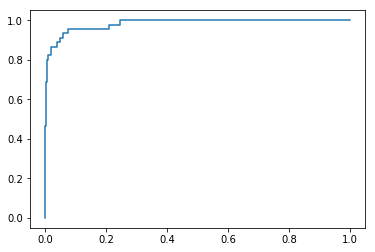

In [108]:
plt.plot(fprs, tprs)
plt.show()

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9830452674897119

- 可以发现auc面积对有偏数据并不敏感

## 6. 多分类问题中的混淆矩阵

In [114]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.95

In [115]:
y_predict = log_reg.predict(X_test)

In [116]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average="micro")

0.95

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 36,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  5,  0,  2,  0,  1,  0,  0, 32,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  1, 30]])

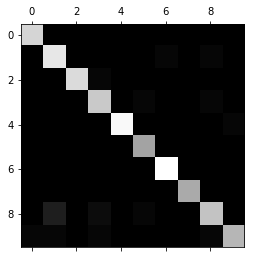

In [119]:
# 绘制混淆矩阵
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [121]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02380952, 0.        , 0.025     , 0.        ],
       [0.        , 0.        , 0.        , 0.02857143, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03703704, 0.        , 0.        , 0.025     , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02941176],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

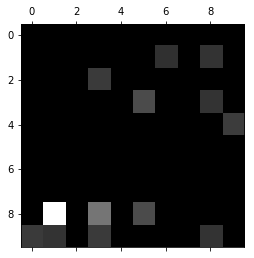

In [122]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()

- 可以看出该模型在哪个类别上犯错了
- 可以看出该模型容易混淆1和8